![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

### Integrantes

- Nelson Santiago Pachon
- Andrés Felipe Valencia Castrillón

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

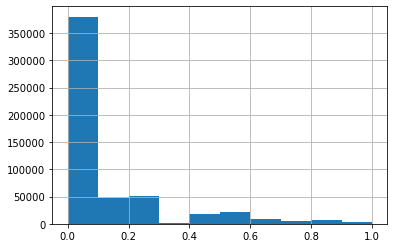

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
X

0         What are you talking about? What group do Pete...
1          NO!, Let him, we need a Conservative government.
2         Perhaps he took the "power out of the Cardinal...
3         As always, yours is dripping with sarcasm, whi...
4         The dirty little secret is that the price rang...
                                ...                        
541457    You wrote: "Both parties campaigned explicitly...
541458    Nowadays. there sure seem to be a lot of credi...
541459    We are lucky wealth filters down to the poor i...
541460    You are half right. Both nature and humans can...
541461    I don't know how you went from yelling at a fo...
Name: comment_text, Length: 541462, dtype: object

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

vectorizer = CountVectorizer(lowercase =True, token_pattern=r'\b\w+\b', stop_words='english')
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(train_vectors, y_train)
predictions = gbr.predict(test_vectors)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

MSE: 0.027458688689612914


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

vectorizer = CountVectorizer(lowercase =True, token_pattern=r'\b\w+\b', stop_words='english', ngram_range=(3,3))
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(train_vectors, y_train)
predictions_trigramas = gbr.predict(test_vectors)

mse_trigrama = mean_squared_error(y_test, predictions_trigramas)
print("MSE con trigramas:", mse_trigrama)

MSE con trigramas: 0.03867407547069949


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

La función TfidfVectorizer genera una matriz de terminos-pesos, es decir, que de cada termino encontrado por dicha libreria en el texto representa una palabra y un peso. Este peso representa la importancia relativa de esa palabra o termino en la base de datos (textos) en comparación con el texto completo o total de registros de texto. 

Dicha librería contiene la técnica TF-IDF (Term Frequency - Inverse Data Frequency), la cual se basa en dos medidas: la Frecuencia de Término/palabra (TF) y la Inversa de Frecuencia de Documento (IDF). La Frecuencia de Término/palabra es una medida de la frecuencia con la que un término específico aparece en un texto. A continuación se muestra la formula para realizar el calculo: 

> $tf_{ij} = \frac{n_{ij}}{\sum_{k}n_{ij}}$

donde i es el termino y j el texto(entiendase como un registro o texto capturado). Entonces seria como el número de veces que aparece el término "i" en el texto "j") / (Número total de términos en el texto "j").

La Inversa de Frecuencia de Documento es una medida de la rareza del término en todo el conjunto. La formula seria la siguiente:

> $idf(w) = log(\frac{N}{df_{t}})$

En esta fórmula, el numerador es el número total de textos en la base de datos, mientras que el denominador cuenta el número de textos que contienen el término "t" en el total de la base de datos. Dividiendo el numerador por el denominador, obtenemos la proporción de textos que no contienen el término "t" en relación al número total de textos. Luego, tomamos el logaritmo natural de esta proporción para obtener un valor positivo que aumenta a medida que disminuye el número de textos que contienen el término "t".

Ahora para calcular el TF-IDF basta con multiplicar TF y IDF. La formula seria la siguiente:

> $w_{ij} = tf_{ij}  * log(\frac{N}{df_{i}})$

Para entender como funciona se plantea el siguiente ejemplo práctico:

Supongamos que tenemos un conjunto de cuatro textos (D1, D2, D3, D4) y queremos calcular el valor de TF-IDF para el término "datos" en cada documento. Supongamos que el término "datos" aparece de la siguiente manera en cada texto:

- D1: "Los datos son importantes en la toma de decisiones"
- D2: "La cantidad de información recopilada es abrumadora"
- D3: "El análisis de datos puede ser complejo"
- D4: "El aprendizaje automático se basa en los datos"

Para calcular la Frecuencia de Término de "datos" en cada texto, contamos el número de veces que aparece "datos" en cada texto y lo dividimos por el número total de términos en el texto:

- TF("datos", D1) = 1/7 = 0.1429
- TF("datos", D2) = 0
- TF("datos", D3) = 1/5 = 0.2
- TF("datos", D4) = 1/6 = 0.1667

Observa que en el texto D2 el término "datos" no aparece en absoluto, por lo que su frecuencia de término es cero.

Para calcular la Inversa de Frecuencia de Documento de "datos" en todo el conjunto de textos, contamos el número de textos que contienen "datos" y lo dividimos por el número total de textos. Luego, tomamos el logaritmo natural de este cociente:

- IDF("datos", {D1, D2, D3, D4}) = log(4/3) = **0.2877**

En este caso, el valor de IDF es distinto de cero porque el término "datos" no aparece en uno de los textos. El valor de IDF es mayor que cero pero no demasiado alto, lo que sugiere que el término "datos" es relativamente común en el conjunto de textos.

Finalmente, para calcular el valor de TF-IDF de "datos" en cada documento, multiplicamos el valor de TF por el valor de IDF:

- TF-IDF("datos", D1) = 0.1429 * 0.2877 = 0.0411
- TF-IDF("datos", D2) = 0 * 0.2877 = 0
- TF-IDF("datos", D3) = 0.2 * 0.2877 = 0.0575
- TF-IDF("datos", D4) = 0.1667 * 0.2877 = 0.048

Se observa que el valor de TF-IDF para "datos" en cada texto es distinto de cero, excepto en D2, donde no aparece el término "datos". Además, el valor de TF-IDF es más alto en los textos donde el término "datos" es más relevante para la comprensión del texto (por ejemplo, D3, donde se habla del "análisis de datos"), y más bajo en los textos donde el término "datos" es menos relevante (por ejemplo, D1, donde se habla de que "los datos son importantes en la toma de decisiones", pero no se profundiza demasiado en el tema).

#### Ventajas y desventajas

La ventaja de TfidfVectorizer sobre CountVectorizer es que TfidfVectorizer considera tanto la frecuencia de un término en un documento como la frecuencia de aparición del término en todo el conjunto de textos, mientras que CountVectorizer solo considera la frecuencia de aparición del término en el texto. Por lo tanto, TfidfVectorizer puede dar una mayor importancia a los términos que son raros en todo el conjunto pero frecuentes en un texto en particular, lo que puede ser útil para identificar palabras clave en un conjunto de textos.

Además, TfidfVectorizer también puede aplicar técnicas de preprocesamiento adicionales, como la eliminación de palabras comunes (stop words), la reducción de palabras a su forma básica (stemming) y la corrección de errores tipográficos.

Sin embargo, una desventaja de TfidfVectorizer es que puede ser más lento que CountVectorizer para conjuntos de datos grandes debido a que requiere un cálculo adicional, IDF. También puede ser menos útil en situaciones en las que la frecuencia de un término es más importante que su importancia relativa en todo el conjunto de textos, como en la identificación de nombres de personas o lugares en un texto.

|                       | TfidfVectorizer             | CountVectorizer             |
|-----------------------|------------------------------|------------------------------|
| Ventajas              | - Da más peso a términos raros | - Útil para análisis simples |
|                       |   que pueden ser más         |   de frecuencia de términos  |
|                       |   relevantes                  |                              |
|                       | - Menos sensible a palabras   | - Sensible a palabras comunes |
|                       |   comunes que no aportan      |   que pueden ser ruido       |
|                       |   mucha información           | - Es más rápido y simple     |
|                       | - Útil para tareas de         | - Es adecuado para tareas de  |
|                       |   clasificación y recuperación|   clasificación y recuperación|
| Desventajas           | - No es bueno para tareas de  | - Da igual importancia a     |
|                       |   análisis simples de         |   palabras comunes y         |
|                       |   frecuencia de términos      |   palabras raras             |
|                       | - Puede no ser efectivo si    | - No da más peso a palabras  |
|                       |   los términos más comunes    |   más raras o relevantes     |
|                       |   son importantes             |                              |
|                       | - Es más lento y computacional| - No toma en cuenta la       |
|                       |   intensivo que CountVectorizer|   relevancia de los términos |

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=True, strip_accents='unicode', stop_words='english')
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(train_vectors, y_train)
predictions_tfidf = gbr.predict(test_vectors)

mse_tfidf = mean_squared_error(y_test, predictions_tfidf)
print("MSE TF-IDF:", mse_tfidf)

MSE TF-IDF: 0.02682138005640473


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

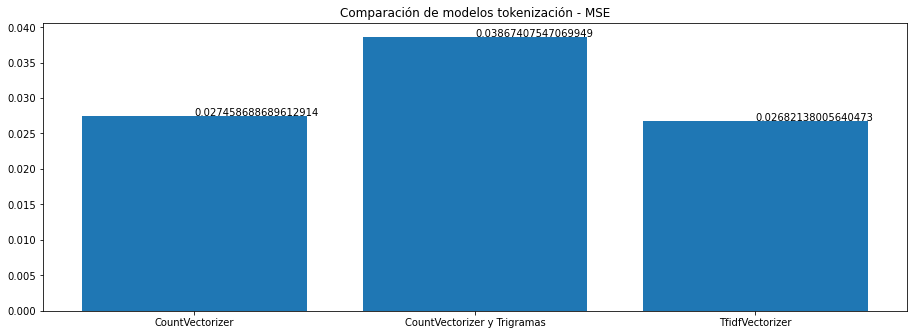

In [13]:
import matplotlib.pyplot as plt

# Datos para el gráfico de barras
ejeX = ['CountVectorizer', 'CountVectorizer y Trigramas', 'TfidfVectorizer']
ejeY = [mse, mse_trigrama, mse_tfidf]

# Crear la figura y el eje, ajustando el ancho de la figura
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])
ax.set_title("Comparación de modelos tokenización - MSE")

# Crear la gráfica de barras
ax.bar(ejeX, ejeY)

# Función para agregar etiquetas a las barras
def addlabels(x, y, plot):
    for i in range(len(x)):
        plot.text(i, y[i], y[i])

# Agregar etiquetas a las barras
addlabels(ejeX, ejeY, plt)

# Mostrar el gráfico
plt.show()

Al utilizar el CountVectorizer con trigramas, el rendimiento del modelo se ve significativamente afectado en la predicción de la variable "target". Esto se debe a que la adición de trigramas aumenta la dimensionalidad del espacio vectorial utilizado en el modelo. Es decir, el modelo debe considerar más características (tokens) al aplicar el algoritmo, a diferencia de cuando se utiliza unigramas. Por lo tanto, el modelo más efectivo sería el primero, ya que su MSE es menor (0.02745).

Al comparar el primer modelo de CountVectorizer con el tercer modelo, el modelo mejorado con TF-IDF resulta ser superior. Esto se debe a que TF-IDF no solo cuenta la frecuencia de aparición de un término, sino que también tiene en cuenta su frecuencia inversa para ponderar las palabras. De esta manera, se disminuye el peso de las palabras comunes que no aportan información significativa, y se aumenta el peso de las palabras menos comunes que son más distintivas y, por lo tanto, más informativas.